## Chapter 7 Resampling and Interpolation

- Upsampling: increase the frequency of the samplesk such as from minutes to seconds.
- Downsampling: decrease the frequency of the samples, such as from days to months.

In [35]:
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
# def parser(x):
#   return datetime.strptime('190'+x, '%Y-%m')
# series = pd.read_csv('data/shampoo-sales.csv', index_col=0, parse_dates=True, date_parser=parser)
# series.head()

In [37]:
series = pd.read_csv('data/shampoo-sales.csv', index_col=0, parse_dates=True, date_format="%Y-%m")  # expects full YYYY-MM

# baseline the year number on an arbitrary year (1900)
series.index = pd.to_datetime("190" + series.index.astype(str), format="%Y-%m")

series.head()


,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [38]:
df = pd.read_csv('data/shampoo-sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


#### Upsampling Data with Interpolation

In [39]:
# upsample to daily intervals
upsampled = series.resample('D').mean()
upsampled.head(32)

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
1901-01-06,NaN
1901-01-07,NaN
1901-01-08,NaN
1901-01-09,NaN


In [45]:
# upsample to daily intervals with linear interpolation
upsampled = series.resample('D').mean())
interpolated = upsampled.interpolate(method='linear')
interpolated.head(32)

SyntaxError: unmatched ')' (ipython-input-2919089300.py, line 2)

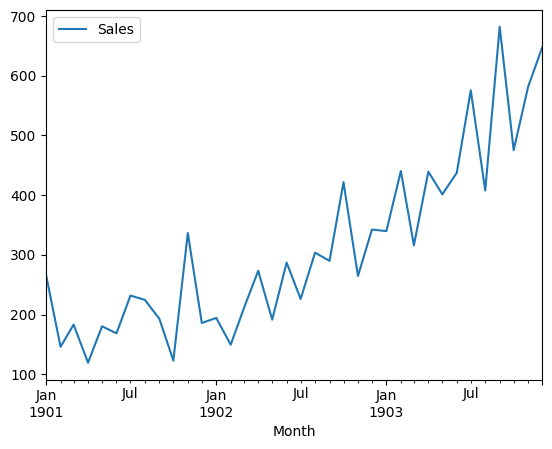

In [46]:
interpolated.plot()
plt.show()

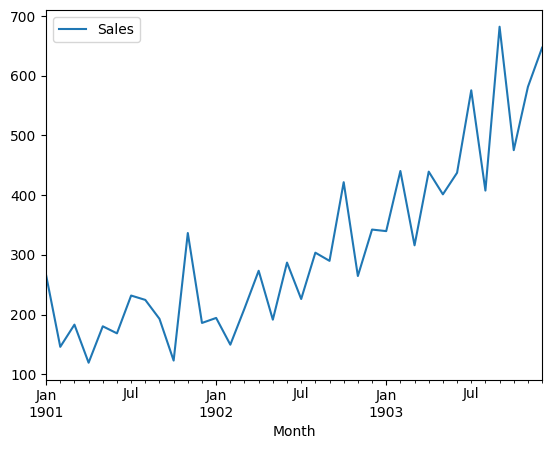

In [47]:
series.plot()
plt.show()

Note that there is no difference between plotting the original data and plotting the upsampled data with linear interpolation as the plot already interpolated the values between points to draw the line.

#### Upsampling Data with Spline Interpolation

In [48]:
# upsample to daily intervals with spline interpolation
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
interpolated.head(32)

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746
1901-01-06,231.727880
1901-01-07,225.575149
1901-01-08,219.651553
1901-01-09,213.957094


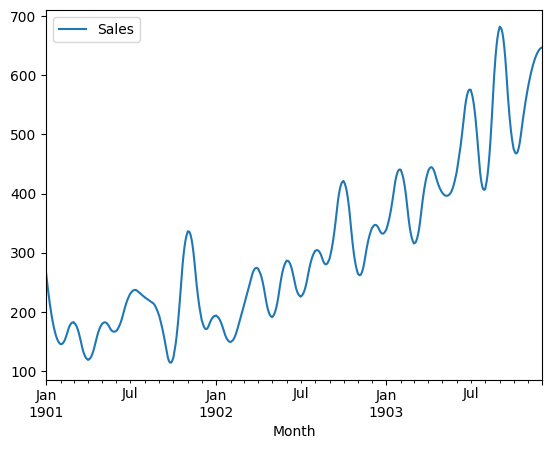

In [49]:
interpolated.plot()
plt.show()

#### Downsampling Data - Quarterly

In [51]:
# downsample to quarterly intervals
resample = series.resample('QE')
quarterly_mean_series = resample.mean()
quarterly_mean_series.head()

,Sales
Month,
1901-03-31,198.333333
1901-06-30,156.033333
1901-09-30,216.366667
1901-12-31,215.100000
1902-03-31,184.633333


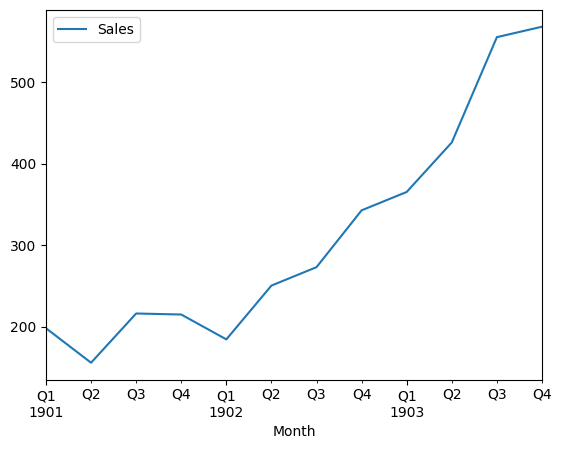

In [52]:
quarterly_mean_series.plot()
plt.show()

#### Downsampling Data - Yearly

In [56]:
# downsample to yearly intervals
resample = series.resample('A')
yearly_sum_series = resample.sum()
yearly_sum_series.head()

/tmp/ipython-input-2031306259.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  resample = series.resample('A')


,Sales
Month,
1901-12-31,2357.5
1902-12-31,3153.5
1903-12-31,5742.6


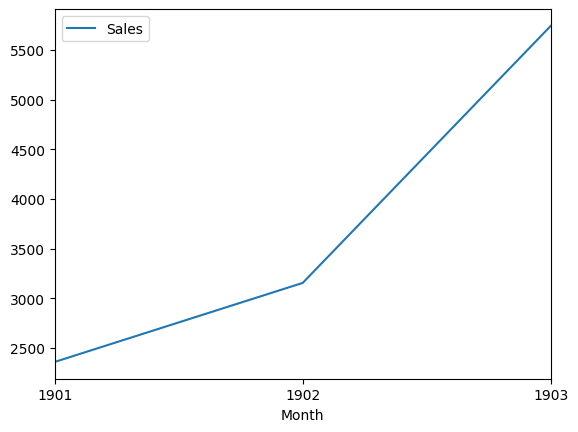

In [58]:
yearly_sum_series.plot()
plt.show()